In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt

In [9]:
from sklearn.datasets import fetch_openml

boston = fetch_openml(name="boston", version=1, as_frame=True)

X = boston.data
y = boston.target

print(X.head())

print(y.head())


      CRIM    ZN  INDUS CHAS    NOX     RM   AGE     DIS RAD    TAX  PTRATIO  \
0  0.00632  18.0   2.31    0  0.538  6.575  65.2  4.0900   1  296.0     15.3   
1  0.02731   0.0   7.07    0  0.469  6.421  78.9  4.9671   2  242.0     17.8   
2  0.02729   0.0   7.07    0  0.469  7.185  61.1  4.9671   2  242.0     17.8   
3  0.03237   0.0   2.18    0  0.458  6.998  45.8  6.0622   3  222.0     18.7   
4  0.06905   0.0   2.18    0  0.458  7.147  54.2  6.0622   3  222.0     18.7   

        B  LSTAT  
0  396.90   4.98  
1  396.90   9.14  
2  392.83   4.03  
3  394.63   2.94  
4  396.90   5.33  
0    24.0
1    21.6
2    34.7
3    33.4
4    36.2
Name: MEDV, dtype: float64


In [6]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 506 entries, 0 to 505
Data columns (total 13 columns):
 #   Column   Non-Null Count  Dtype   
---  ------   --------------  -----   
 0   CRIM     506 non-null    float64 
 1   ZN       506 non-null    float64 
 2   INDUS    506 non-null    float64 
 3   CHAS     506 non-null    category
 4   NOX      506 non-null    float64 
 5   RM       506 non-null    float64 
 6   AGE      506 non-null    float64 
 7   DIS      506 non-null    float64 
 8   RAD      506 non-null    category
 9   TAX      506 non-null    float64 
 10  PTRATIO  506 non-null    float64 
 11  B        506 non-null    float64 
 12  LSTAT    506 non-null    float64 
dtypes: category(2), float64(11)
memory usage: 45.1 KB


In [ ]:
''' CRIM  Per capita crime rate by town

ZN  Proportion of residential land zoned for large lots (over 25,000 sq.ft)

INDUS  Proportion of non-retail business acres per town

CHAS  Charles River dummy variable

  1 = bounds river

  0 = otherwise

NOX  Nitric oxide concentration (air pollution level)

RM  Average number of rooms per dwelling

AGE  Proportion of owner-occupied units built before 1940

DIS  Weighted distance to five Boston employment centers

RAD  Index of accessibility to radial highways

TAX  Full-value property tax rate per $10,000

PTRATIO  Pupil teacher ratio by town

B  Proportion related to Black population (historical data variable)

LSTAT  Percentage of lower status population

MEDV  Target variable → Median value of homes (in $1000s) '''

In [12]:
X.isnull().sum()

CRIM       0
ZN         0
INDUS      0
CHAS       0
NOX        0
RM         0
AGE        0
DIS        0
RAD        0
TAX        0
PTRATIO    0
B          0
LSTAT      0
dtype: int64

In [23]:
### Stattistical Summary
print(X.describe())

             CRIM          ZN       INDUS         NOX          RM         AGE  \
count  506.000000  506.000000  506.000000  506.000000  506.000000  506.000000   
mean     3.613524   11.363636   11.136779    0.554695    6.284634   68.574901   
std      8.601545   23.322453    6.860353    0.115878    0.702617   28.148861   
min      0.006320    0.000000    0.460000    0.385000    3.561000    2.900000   
25%      0.082045    0.000000    5.190000    0.449000    5.885500   45.025000   
50%      0.256510    0.000000    9.690000    0.538000    6.208500   77.500000   
75%      3.677083   12.500000   18.100000    0.624000    6.623500   94.075000   
max     88.976200  100.000000   27.740000    0.871000    8.780000  100.000000   

              DIS         TAX     PTRATIO           B       LSTAT  
count  506.000000  506.000000  506.000000  506.000000  506.000000  
mean     3.795043  408.237154   18.455534  356.674032   12.653063  
std      2.105710  168.537116    2.164946   91.294864    7.141062 

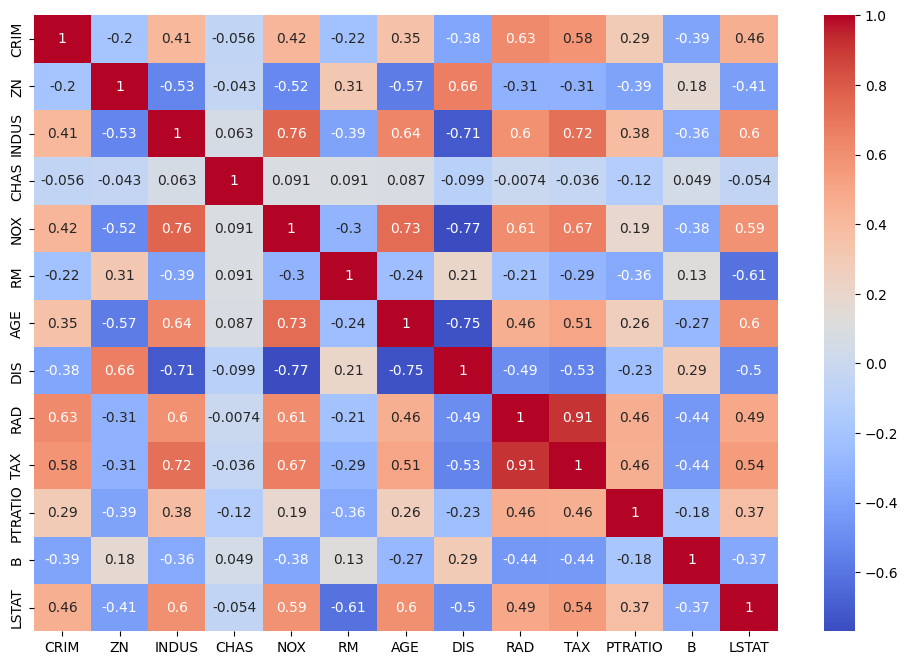

In [25]:
plt.figure(figsize=(12, 8))
sns.heatmap(X.corr(), annot=True, cmap='coolwarm')
plt.show()

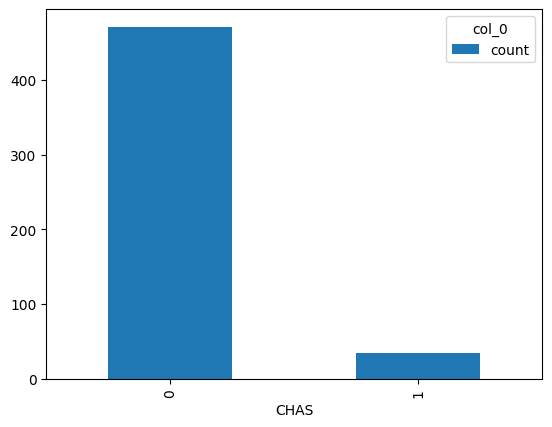

In [58]:
pd.crosstab(X['CHAS'],columns='count').plot(kind='bar')
plt.show()

<Axes: >

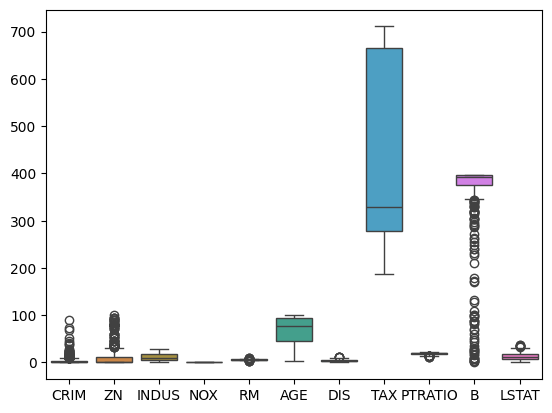

In [27]:
sns.boxplot(data=X)

In [29]:
### Remove the Column 'B' with Huge No:of Noise Values it much not contribute to the Model
X = X.drop(columns=['B'])

In [34]:
from sklearn.model_selection import train_test_split
from lightgbm import LGBMRegressor
from sklearn.metrics import mean_squared_error, r2_score

In [36]:
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA

In [41]:
x_train,x_test,y_train,y_test = train_test_split(X,y,test_size=0.2,random_state=42)
scaler = StandardScaler()
x_train_scaled = scaler.fit_transform(x_train)
x_test_scaled = scaler.transform(x_test) 
model = LGBMRegressor()
model.fit(x_train_scaled,y_train)

,boosting_type,'gbdt'
,num_leaves,31
,max_depth,-1
,learning_rate,0.1
,n_estimators,100
,subsample_for_bin,200000
,objective,None
,class_weight,None
,min_split_gain,0.0
,min_child_weight,0.001
,min_child_samples,20


In [42]:
y_pred = model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)

c:\CODEX-INTERN\venv\lib\site-packages\sklearn\utils\validation.py:2749: UserWarning: X does not have valid feature names, but LGBMRegressor was fitted with feature names
  warnings.warn(


In [43]:
print(f"Mean Squared Error: {mse}")
print(f"R^2 Score: {r2_score(y_test, y_pred)}")

Mean Squared Error: 8.891034814432215
R^2 Score: 0.878759359857454


In [44]:
### In this Model we Need to perform HyperParameter Tuning to get Better Results
from sklearn.model_selection import GridSearchCV
param_grid = {
    'num_leaves': [31, 50, 70],
    'learning_rate': [0.01, 0.05, 0.1],
    'n_estimators': [100, 200, 500]
}
grid_search = GridSearchCV(estimator=LGBMRegressor(), param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled, y_train)

,estimator,LGBMRegressor()
,param_grid,"{'learning_rate': [0.01, 0.05, ...], 'n_estimators': [100, 200, ...], 'num_leaves': [31, 50, ...]}"
,scoring,'neg_mean_squared_error'
,n_jobs,-1
,refit,True
,cv,3
,verbose,0
,pre_dispatch,'2*n_jobs'
,error_score,nan
,return_train_score,False
,boosting_type,'gbdt'


In [45]:
grid_search.best_params_

{'learning_rate': 0.05, 'n_estimators': 200, 'num_leaves': 31}

In [ ]:
y_pred=grid_search.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)


In [48]:
print(f"Mean Squared Error after HyperParameter Tuning: {mse}")
print(f"R^2 Score after HyperParameter Tuning: {r2_score(y_test, y_pred)}")

Mean Squared Error after HyperParameter Tuning: 8.749103399701253
R^2 Score after HyperParameter Tuning: 0.8806947763682955


In [50]:
### Much not improved Performance Try with another Model

In [ ]:
from sklearn.ensemble import RandomForestRegressor 
rf_model = RandomForestRegressor(n_estimators=100, random_state=42)
rf_model.fit(x_train_scaled, y_train)
y_pred = rf_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Random Forest: {mse}")
print(f"R^2 Score with Random Forest: {r2_score(y_test, y_pred)}")


Mean Squared Error with Random Forest: 8.00834697058824
R^2 Score with Random Forest: 0.8907959384410822


In [52]:
### Tuning the HyperParameters of RandomForestRegressor can give Better Results
from sklearn.model_selection import GridSearchCV
param_grid = {
    'n_estimators': [100, 200, 500],
    'max_depth': [None, 10, 20, 30],
    'min_samples_split': [2, 5, 10]
}
grid_search = GridSearchCV(estimator=RandomForestRegressor(random_state=42), param_grid=param_grid, cv=3, n_jobs=-1, scoring='neg_mean_squared_error')
grid_search.fit(x_train_scaled, y_train)
grid_search.best_params_
y_pred = grid_search.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Tuned Random Forest: {mse}")
print(f"R^2 Score with Tuned Random Forest: {r2_score(y_test, y_pred)}")


Mean Squared Error with Tuned Random Forest: 8.74673155096682
R^2 Score with Tuned Random Forest: 0.8807271195617354


In [53]:
from sklearn.tree import DecisionTreeRegressor
dt_model = DecisionTreeRegressor(random_state=42)
dt_model.fit(x_train_scaled, y_train)
y_pred = dt_model.predict(x_test_scaled)
mse = mean_squared_error(y_test, y_pred)
print(f"Mean Squared Error with Decision Tree: {mse}")
print(f"R^2 Score with Decision Tree: {r2_score(y_test, y_pred)}")


Mean Squared Error with Decision Tree: 8.979803921568626
R^2 Score with Decision Tree: 0.8775488794579587


In [54]:
## compared all the Models RandomForestRegressor is best suited for this Dataset